In [1]:
import duckdb 

with duckdb.connect("data/sakila.duckdb") as conn: 
    description = conn.sql("DESC;").df()

description 

,database,schema,name,column_names,column_types,temporary
0,sakila,staging,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,sakila,staging,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,sakila,staging,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,sakila,staging,actor,"[actor_id, first_name, last_name, last_update,...","[DECIMAL(38,9), VARCHAR, VARCHAR, TIMESTAMP, V...",False
4,sakila,staging,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
5,sakila,staging,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
6,sakila,staging,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",False
7,sakila,staging,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",False
8,sakila,staging,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
9,sakila,staging,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False


### Storing data into dictionary of dfs

In [5]:
dfs = {}

with duckdb.connect("data/sakila.duckdb") as conn:
    for name in description["name"]:
        if name[0] != "_":
            dfs[name] = conn.sql(f"FROM {name};").df()
            
            #duckdb.register(name, dfs[name])
        
#dfs["actor"]

CatalogException: Catalog Error: Table with name actor does not exist!
Did you mean "staging.actor"?

In [ ]:
duckdb.sql("DESC;")

┌──────────┬─────────┬─────────┬──────────────┬──────────────┬───────────┐
│ database │ schema  │  name   │ column_names │ column_types │ temporary │
│ varchar  │ varchar │ varchar │  varchar[]   │  varchar[]   │  boolean  │
├──────────┴─────────┴─────────┴──────────────┴──────────────┴───────────┤
│                                 0 rows                                 │
└────────────────────────────────────────────────────────────────────────┘

## Task 1, a)

In [ ]:
duckdb.sql("""--sql
SELECT
    film.title,
    film.length,
    film.release_year
FROM
    film

WHERE
    film.length > 180
""")

CatalogException: Catalog Error: Table with name film does not exist!
Did you mean "sqlite_master"?

## Task 1 b) 

In [ ]:
duckdb.sql("""--sql
SELECT
    film.title,
    film.rating,
    film.length,
    description

FROM
    film    

WHERE 
    REGEXP_MATCHES(title, '\\bLOVE\\b') --Why do i need double backslash here?

""")

┌───────────────┬─────────┬────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     title     │ rating  │ length │                                                 description                                                  │
│    varchar    │ varchar │ int64  │                                                   varchar                                                    │
├───────────────┼─────────┼────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ GRAFFITI LOVE │ PG      │    117 │ A Unbelieveable Epistle of a Sumo Wrestler And a Hunter who must Build a Composer in Berlin                  │
│ IDAHO LOVE    │ PG-13   │    172 │ A Fast-Paced Drama of a Student And a Crocodile who must Meet a Database Administrator in The Outback        │
│ INDIAN LOVE   │ NC-17   │    135 │ A Insightful Saga of a Mad Scientist And a Mad Scientist who must Kill a As

: 

: 

: 

## Task 1 c)

In [ ]:
#  Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and
#  longest movie length


duckdb.sql("""--sql
SELECT
    ROUND(MIN(length)) AS shortest_length,
    ROUND(AVG(length)) AS average_length,
    ROUND(MEDIAN(length)) AS median_length,
    ROUND(MAX(length)) AS longest_length

FROM
    film



""")

┌─────────────────┬────────────────┬───────────────┬────────────────┐
│ shortest_length │ average_length │ median_length │ longest_length │
│      int64      │     double     │    double     │     int64      │
├─────────────────┼────────────────┼───────────────┼────────────────┤
│              46 │          115.0 │         114.0 │            185 │
└─────────────────┴────────────────┴───────────────┴────────────────┘

: 

: 

: 

## Task 1 d)

In [ ]:
# The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can
# keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.

duckdb.sql("""--sql
SELECT
    title,
    rental_rate,
    rental_duration,
    ROUND(rental_rate / rental_duration, 2) AS cost_per_day
    
FROM
    film
    
ORDER BY
    cost_per_day DESC
    
""")

┌───────────────────────┬─────────────┬─────────────────┬──────────────┐
│         title         │ rental_rate │ rental_duration │ cost_per_day │
│        varchar        │   double    │      int64      │    double    │
├───────────────────────┼─────────────┼─────────────────┼──────────────┤
│ PATHS CONTROL         │        4.99 │               3 │         1.66 │
│ BACKLASH UNDEFEATED   │        4.99 │               3 │         1.66 │
│ BEHAVIOR RUNAWAY      │        4.99 │               3 │         1.66 │
│ VIRTUAL SPOILERS      │        4.99 │               3 │         1.66 │
│ TEEN APOLLO           │        4.99 │               3 │         1.66 │
│ TELEGRAPH VOYAGE      │        4.99 │               3 │         1.66 │
│ BILKO ANONYMOUS       │        4.99 │               3 │         1.66 │
│ HEARTBREAKERS BRIGHT  │        4.99 │               3 │         1.66 │
│ CLERKS ANGELS         │        4.99 │               3 │         1.66 │
│ TIES HUNGER           │        4.99 │            

: 

: 

: 

## Task 1 e) 

In [ ]:
# Which actors have played in most movies? Show the top 10 actors with the number of movies they have
# played in.

: 

: 

: 

In [ ]:
duckdb.sql("""--sql

SELECT
    actor.actor_id,
    actor.first_name,
    actor.last_name,
    COUNT(film_actor.film_id) AS number_of_movies

FROM
    actor
    
INNER JOIN
    film_actor ON actor.actor_id = film_actor.actor_id
    

GROUP BY
    actor.actor_id,
    actor.first_name,
    actor.last_name
    
ORDER BY 
    number_of_movies DESC
    
LIMIT 10

""")

┌──────────┬────────────┬─────────────┬──────────────────┐
│ actor_id │ first_name │  last_name  │ number_of_movies │
│  double  │  varchar   │   varchar   │      int64       │
├──────────┼────────────┼─────────────┼──────────────────┤
│    107.0 │ GINA       │ DEGENERES   │               42 │
│    102.0 │ WALTER     │ TORN        │               41 │
│    198.0 │ MARY       │ KEITEL      │               40 │
│    181.0 │ MATTHEW    │ CARREY      │               39 │
│     23.0 │ SANDRA     │ KILMER      │               37 │
│     81.0 │ SCARLETT   │ DAMON       │               36 │
│    144.0 │ ANGELA     │ WITHERSPOON │               35 │
│    158.0 │ VIVIEN     │ BASINGER    │               35 │
│    106.0 │ GROUCHO    │ DUNST       │               35 │
│     37.0 │ VAL        │ BOLGER      │               35 │
├──────────┴────────────┴─────────────┴──────────────────┤
│ 10 rows                                      4 columns │
└───────────────────────────────────────────────────────

: 

: 

: 

## Task 1 Optional questions f)

### Which store has the most customers? 

In [ ]:
duckdb.sql("""--sql

SELECT
    store_id,
    COUNT(customer_id) as number_of_customers
    
FROM 
    customer
    
GROUP BY
    store_id
    
ORDER BY
    number_of_customers DESC

""")

┌──────────┬─────────────────────┐
│ store_id │ number_of_customers │
│  int64   │        int64        │
├──────────┼─────────────────────┤
│        1 │                 326 │
│        2 │                 273 │
└──────────┴─────────────────────┘

: 

: 

: 

### What are the top 10 movies in our inventory?

In [ ]:
duckdb.sql("""--sql

SELECT
    film.title,
    COUNT(inventory.inventory_id) AS number_of_copies
    
FROM film

JOIN inventory ON film.film_id = inventory.film_id

GROUP BY
    film.title
    
ORDER BY
    number_of_copies DESC
    
LIMIT 10;

""")

┌───────────────────────┬──────────────────┐
│         title         │ number_of_copies │
│        varchar        │      int64       │
├───────────────────────┼──────────────────┤
│ FORWARD TEMPLE        │                8 │
│ GOODFELLAS SALUTE     │                8 │
│ GARDEN ISLAND         │                8 │
│ BOUND CHEAPER         │                8 │
│ JUGGLER HARDLY        │                8 │
│ CROSSROADS CASUALTIES │                8 │
│ MUSCLE BRIGHT         │                8 │
│ DEER VIRGINIAN        │                8 │
│ HUSTLER PARTY         │                8 │
│ RIDGEMONT SUBMARINE   │                8 │
├───────────────────────┴──────────────────┤
│ 10 rows                        2 columns │
└──────────────────────────────────────────┘

: 

: 

: 

### What are our top 10 highest replacement costs?

In [ ]:
duckdb.sql("""--sql

SELECT
    title,
    replacement_cost

FROM 
    film
    
ORDER BY
    replacement_cost DESC
    
LIMIT 10

""")

┌─────────────────────────┬──────────────────┐
│          title          │ replacement_cost │
│         varchar         │      double      │
├─────────────────────────┼──────────────────┤
│ BLINDNESS GUN           │            29.99 │
│ BONNIE HOLOCAUST        │            29.99 │
│ CLYDE THEORY            │            29.99 │
│ ARABIA DOGMA            │            29.99 │
│ CRUELTY UNFORGIVEN      │            29.99 │
│ CLOCKWORK PARADISE      │            29.99 │
│ CUPBOARD SINNERS        │            29.99 │
│ BALLROOM MOCKINGBIRD    │            29.99 │
│ CHARIOTS CONSPIRACY     │            29.99 │
│ DESPERATE TRAINSPOTTING │            29.99 │
├─────────────────────────┴──────────────────┤
│ 10 rows                          2 columns │
└────────────────────────────────────────────┘

: 

: 

: 

### Which staff member has generated the least revenue and how many rentals have they handled?

In [ ]:
duckdb.sql("""--sql

SELECT
    staff.staff_id,
    staff.first_name,
    staff.last_name,
    COUNT(payment.payment_id) AS number_of_payments,
    ROUND(SUM(payment.amount), 2) AS total_revenue,
    ROUND(AVG(payment.amount), 2) AS average_revenue_per_payment

FROM
    staff
    
JOIN payment ON staff.staff_id = payment.staff_id


GROUP BY
    staff.staff_id,
    staff.first_name,
    staff.last_name

ORDER BY total_revenue ASC;


""")

┌──────────┬────────────┬───────────┬────────────────────┬───────────────┬─────────────────────────────┐
│ staff_id │ first_name │ last_name │ number_of_payments │ total_revenue │ average_revenue_per_payment │
│  int64   │  varchar   │  varchar  │       int64        │    double     │           double            │
├──────────┼────────────┼───────────┼────────────────────┼───────────────┼─────────────────────────────┤
│        1 │ Mike       │ Hillyer   │               8057 │      33489.47 │                        4.16 │
│        2 │ Jon        │ Stephens  │               7992 │      33927.04 │                        4.25 │
└──────────┴────────────┴───────────┴────────────────────┴───────────────┴─────────────────────────────┘

: 

: 

: 

## Task 2 a)

In [ ]:
#Who are our top 5 customers by total spend? 
import pandas as pd
top_5_customers_df = duckdb.sql("""--sql

SELECT
    customer.customer_id,
    customer.first_name || ' ' || customer.last_name AS full_name,
    ROUND(SUM(payment.amount), 2) AS total_spent,
    customer.active
    
FROM
    customer

JOIN payment ON customer.customer_id = payment.customer_id

GROUP BY
    customer.customer_id,
    customer.first_name,
    customer.last_name,
    customer.active
    
    
ORDER BY 
    SUM(payment.amount) DESC

LIMIT 5

""").df()


top_5_customers_df.plot(
    kind = "bar",
    x = "full_name",
    y = "total_spent",
    title = "Our top 5 customers by total money spent",
    rot = 20
    
)


NameError: name 'duckdb' is not defined

: 

: 

: 

## Task 2 b)

<Axes: title={'center': 'Total revenue per film category'}, ylabel='name'>

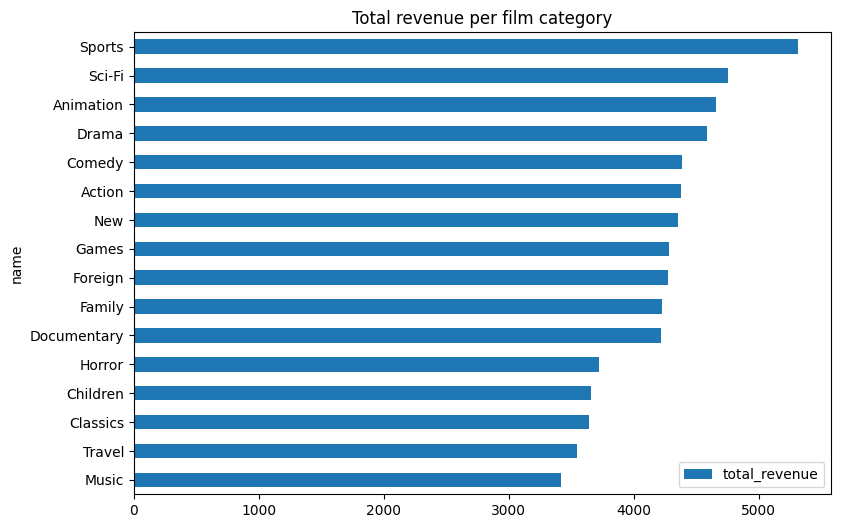

: 

: 

: 

In [ ]:
# b) How much money does each film category bring in? Make a bar chart showing total revenue per film
#    category.
import pandas as pd
top_category_revenue =duckdb.sql("""--sql

SELECT
    category.name,
    ROUND(SUM(payment.amount), 2) as total_revenue

FROM
    category

JOIN film_category on category.category_id = film_category.category_id
JOIN film on film_category.film_id = film.film_id
JOIN inventory on film.film_id = inventory.film_id
JOIN rental on inventory.inventory_id = rental.inventory_id
JOIN payment on rental.rental_id = payment.rental_id

GROUP BY
    category.name
    
ORDER BY
    total_revenue ASC

""").df()

top_category_revenue.plot(
    kind = "barh",
    x = "name",    
    y = "total_revenue",
    title = "Total revenue per film category",
    figsize = (9,6)
)